In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
path = './USvideos.csv'
df = pd.read_csv(path)

/Users/jorgeperez/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [62]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,percentage_of_likes
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People and Vlogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.950969534
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.940521238
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.964729276
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0.938549548
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.985181488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets and Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,0.964977
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People and Vlogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,0.993674
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,0.978982
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film and Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,0.985465


In [63]:
data_wanted = df[['views','dislikes', 'likes']]
data_wanted

,views,dislikes,likes
0,748374,2966,57527
1,2418783,6146,97185
2,3191434,5339,146033
3,343168,666,10172
4,2095731,1989,132235
...,...,...,...
40944,1685609,1385,38160
40945,1064798,382,60008
40946,1066451,1032,48068
40947,5660813,2846,192957


In [64]:
df['percentage_of_likes'] = (((df['likes'])/(df['dislikes'] + df['likes'])) * 100).round()


In [65]:
video_percentage_missing = df['percentage_of_likes'].isna()
df.loc[video_percentage_missing, 'percentage_of_likes'] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  object 
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  object 
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

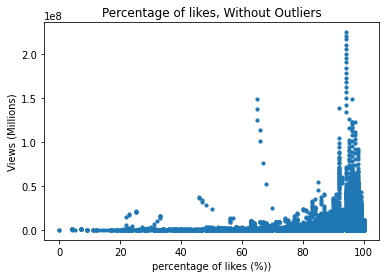

In [68]:
import numpy as np
area = np.pi*3
colors = (0,0,0)
plt.scatter(percentage_of_likes, total_views, s = 10)
plt.xlabel('percentage of likes (%))')
plt.ylabel('Views (Millions)')
plt.title('Percentage of likes, Without Outliers')
df.info()

ValueError: x and y must be the same size

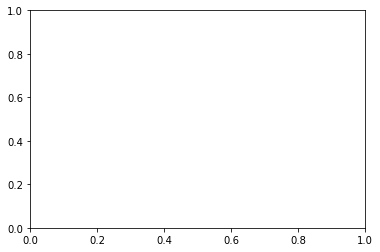

In [67]:
# removing outliers
x = df['percentage_of_likes']
removed_outliers1 = x.between(x.quantile(.05), x.quantile(.95))
y = df['views']
removed_outliers2 = y.between(y.quantile(.05), y.quantile(.95))
#doing a scatterplot
plt.scatter(x[removed_outliers1],y[removed_outliers2], s=10, c='blue')
plt.xlabel('percentage of likes (%))')
plt.ylabel('Views (Millions)')
plt.title('Percentage of likes, Without Outliers')
plt.tight_layout()